In [1]:
import random
import sys

import numpy as np
import matplotlib.pyplot as plt

# Bokeh imports
from bokeh.io import output_notebook, show, save
from bokeh.plotting import figure, output_file, ColumnDataSource, reset_output
from bokeh.models import HoverTool
output_notebook()

from ipywidgets.widgets import Text

#scipy constants
from scipy.constants import Boltzmann as kB
from scipy.constants import Avogadro as NA
from scipy.constants import Planck as h
from scipy.constants import speed_of_light as c0
from scipy.constants import R

sys.path.append('../CNT-SIM/')
from CNTSimFile import CNTSimFile
from mc_sim import exciton_sim_4_lvl_full_exchange, exciton_sim

Loading BokehJS ...

In [2]:
k_er_per_s = 0.1e9
k_br_per_s = 0.1e9  # constant for radiativ decay from S11*
k_enr_per_s = 2e8 
k_bnr_per_s = 4e8   # constant for non-radiativ decay from S11*

k_de_per_s = 1e8  # constant for going from dark to S11 state
k_ed_per_s = 1e8  # constant for going from S11 to dark statestate

# termal detrapping 10.1021/acs.jpclett.8b03732
k_bd_per_s = 0.5 * (1e12 / 385 + 1e12 / 1132) + 0.1e12 * np.exp(-1.6182e-11 /
                                                                (kB * 300))

k_dnr_per_s = 2e8

kin_const_1 = np.array([k_br_per_s, k_er_per_s, k_bnr_per_s, k_enr_per_s, k_bd_per_s, k_ed_per_s,
                        k_de_per_s, k_dnr_per_s])

In [3]:
diff_const = np.zeros((2,8))

In [4]:
diff_const[0, :] = np.linspace(1.07e15,1e17, 8)
diff_const[1, :] = np.linspace(1.07e15/3,1e17/3, 8)

In [5]:
diff_const

array([[1.07000000e+15, 1.52028571e+16, 2.93357143e+16, 4.34685714e+16,
        5.76014286e+16, 7.17342857e+16, 8.58671429e+16, 1.00000000e+17],
       [3.56666667e+14, 5.06761905e+15, 9.77857143e+15, 1.44895238e+16,
        1.92004762e+16, 2.39114286e+16, 2.86223810e+16, 3.33333333e+16]])

In [6]:
exc_sim_diff_1 = CNTSimFile('../sim_output/2020-09-11_exciton_sim_diff_1.h5', kin_const_1)

In [7]:
exc_sim_diff_1.diffusion_dependence(10000, exciton_sim, diff_const, {'t_step': 1, 'r_exc_nm': 2,
                                                                     'n_defects': 30, 'CNT_length': 750})

To be implemented
start of calculation: 2020-09-14 10:42:42.676962
start of exiton simulation: 2020-09-14 10:42:42.677083
2020-09-14 10:42:42.678409
elapsed time: 00:00:00
exciton processed((0/ diff_dependence.shape[1]))
start of exiton simulation: 2020-09-14 10:42:42.678643
2020-09-14 10:51:15.227559
elapsed time: 00:08:32
exciton processed((1/ diff_dependence.shape[1]))
start of exiton simulation: 2020-09-14 10:51:15.232748
2020-09-14 10:59:51.477056
elapsed time: 00:08:36
exciton processed((2/ diff_dependence.shape[1]))
start of exiton simulation: 2020-09-14 10:59:51.478569
2020-09-14 11:08:31.610066
elapsed time: 00:08:40
exciton processed((3/ diff_dependence.shape[1]))
start of exiton simulation: 2020-09-14 11:08:31.618389
2020-09-14 11:16:55.607236
elapsed time: 00:08:23
exciton processed((4/ diff_dependence.shape[1]))
start of exiton simulation: 2020-09-14 11:16:55.612511
2020-09-14 11:25:12.631312
elapsed time: 00:08:17
exciton processed((5/ diff_dependence.shape[1]))
start of 

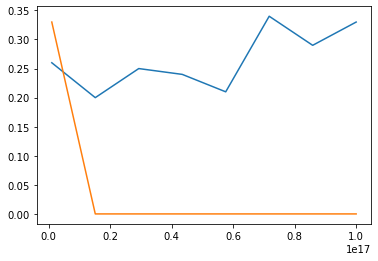

In [8]:
plt.plot(diff_const[0, :], exc_sim_diff_1.QY*100)